# IBM Coursera Advanced Data Science Capstone
## by Alfredo Perez

## Predict Global COVID-19 Growth

<h3>Table of Contents</h3>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
          <a href="#intro">1. Introduction and Business Problem</a><br>
          <a href="#intro">2. Methodology and Architecture</a><br>
          <a href="#data">3. Data Preparation</a>
              <ul>
                <li><a href="read">3.1. Read COVID-19 Data from DATA.WORLD site</a></li>
                <li><a href="readirs">3.2. Data Preparation</a></li>
              </ul>
          <a href="#analysis">4. Analysis and Results</a><br>
            <ul>
                <li><a href="desc">4.1. Data Exploration and Descriptive Analysis</a></li>
                <li><a href="kmean">4.2. Autoregression Model to Estimate COVID-19 Growth</a></li>
            </ul>  
          <a href="#refren">5. References</a><br>
         
                
</div>

<hr>

## 1. Introduction: Business Problem, Scope and Background

The COVID-19 (commonly called coronavirus) virus outbreak has affected everyone's lives. In a very short period of time we have witness the exponential growth of confirmed cases and deaths toll, and a pandemic has officially been declared. 

Worldwide health organizations are working around the clock to mitigate this crisis and fine a solution is the shortest time possible. At the time of preparing this project, Data Scsientist from around the world are crunching data and algorithm, both in realtime and batch, in order to provide valuable insights of this unprecedent health situation.

The goal and interest of this study is to explore and provide a simple model of growth of future COVID-19 cases based in the data created and updated by Johns Hopkins University (JHU) and stored at DATA.WORLD, a  collaborative data community, which reliable, free and open to the public. 

Considering this problem, I will group the organizations, subject to this study, and provide relevant information and graphs to help to set the model.

## 2. Methodology and Architecture

- I used the COVID-19 datasets created and updated by Johns Hopkins University (JHU) and stored at DATA.WORLD. 
- The dataset is not updated in real-time but on a daily basis and and this satisfy the requirement of this project.
- I will use a Jupyter Notebook and Python to prepare, share (Deploy) and present the case. 
- Python Panda and SQLAlchemy SQL toolkit are used for the data transformation and feature creation.
- Matplotlib, StandardScaler and Auto Regresor (AR) model are used to create the model
- I break my analysis in two different segments. The first one is an exploratory data using descriptive analysis and the second part I will use the a non-linear autoregresor model.
- MSE and RMSE (Root Mean Square Error) will be used for model performance assessment

## 3. Data Preparation

### 3.1. Read COVID-19 Data from DATA.WORLD site


I will use a dataset in  CSV format, available at __DATA.WORLD__, a collaborative data community site, which is free and open to the public. This specific dataset is updated by __Johns Hopkins University (JHU)__ and DATA.WORLD keeps a more comprehensive table view. JHU is  updating this datasets on a daily basis and can be accessed via a public URL. 

Datasets: Coronavirus daily data
Source: Johns Hopkins University (DATA.WORLD)

- dfd -> Total new/cumulative confirmed and deaths cases


## Importing Libraries

In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.22.2.post1)


In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#from keras import backend as K
#from tensorflow.keras import backend
import pandas as pd
from pandas import DataFrame

In [3]:
# Total Dataset
dfd = pd.read_csv('https://query.data.world/s/qasmfvycj4e74pa55b3mmwue3bhzev')
dfd.to_csv(r'JHU_COVID-19.csv', index = False)


### 3.2. Data Preparation


In [4]:
# Sort Dataframe
dfd = dfd.sort_values(["Case_Type", "Date"], ascending = (True, True))
dfd.reset_index(drop=False, inplace=True)
dfd.head()

,index,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Prep_Flow_Runtime,Table_Names
0,39820,Confirmed,0.0,NaN,1/22/2020,Liberia,NaN,NaN,NaN,NaN,6.4281,-9.4295,3/29/2020,Time Series
1,39825,Confirmed,0.0,NaN,1/22/2020,US,Pennsylvania,NaN,NaN,NaN,39.9078,-77.2098,3/29/2020,Time Series
2,39826,Confirmed,0.0,NaN,1/22/2020,Bulgaria,NaN,NaN,NaN,NaN,42.7339,25.4858,3/29/2020,Time Series
3,39828,Confirmed,4.0,NaN,1/22/2020,China,Hainan,NaN,NaN,NaN,19.1959,109.7453,3/29/2020,Time Series
4,39829,Confirmed,0.0,NaN,1/22/2020,Eritrea,NaN,NaN,NaN,NaN,15.1794,39.7823,3/29/2020,Time Series


In [5]:
#Create a new Daliy Summarized Daataframe
dfd_day = DataFrame(dfd, columns= ['Date','Country_Region','Case_Type','Cases','Difference'])

#Replace all NaN values for zeroes
dfd_day = dfd_day.replace(np.nan, 0)

# Standardize the date format
dfd_day['Date'] = pd.to_datetime(dfd.Date)
dfd_day.head()

,Date,Country_Region,Case_Type,Cases,Difference
0,2020-01-22,Liberia,Confirmed,0.0,0.0
1,2020-01-22,US,Confirmed,0.0,0.0
2,2020-01-22,Bulgaria,Confirmed,0.0,0.0
3,2020-01-22,China,Confirmed,4.0,0.0
4,2020-01-22,Eritrea,Confirmed,0.0,0.0


In [6]:
# Slice dataframe by New and Death cases respectively 
dfd_cases=dfd_day.loc[dfd_day['Case_Type']=='Confirmed']
dfd_deaths=dfd_day.loc[dfd_day['Case_Type']=='Deaths']
print('*** Slice Dataframes for Confirmed and Deaths Cases Created')

*** Slice Dataframes for Confirmed and Deaths Cases Created


In [7]:
# Group New Cases by day
dfd_casesv=pd.pivot_table(dfd_cases, index=['Date'],values=['Cases','Difference'],aggfunc=np.sum)
dfd_casesv.reset_index(drop=False, inplace=True)
dfd_casesv.head()

# Group deaths by day
dfd_deathsv=pd.pivot_table(dfd_deaths, index=['Date'],values=['Cases','Difference'],aggfunc=np.sum)
dfd_deathsv.reset_index(drop=False, inplace=True)
dfd_casesv.head()

,Date,Cases,Difference
0,2020-01-22,555.0,0.0
1,2020-01-23,654.0,99.0
2,2020-01-24,941.0,287.0
3,2020-01-25,1434.0,493.0
4,2020-01-26,2118.0,684.0


In [8]:
# Make a copy of confirmed cases and deaths dataframes
dfd_cases_c = dfd_cases 
dfd_deaths_c = dfd_deaths 

# Import sqlalchemy Python Toolkit and convert dataframes to tables.
from sqlalchemy.types import Integer, Text, String, DateTime
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

dfd_cases_c.to_sql("covcases",
               engine,
               if_exists='replace',
               index=False)

dfd_deaths_c.to_sql("dfdd",
               engine,
               if_exists='replace',
               index=False)

print('*** Sqlalchemy SQL Tables Created')

*** Sqlalchemy SQL Tables Created


In [9]:
# Find Top 10 Countries in the World with mode Cases
dfd_top_c = pd.read_sql("SELECT Country_Region,  SUM(Difference) as total_cases  FROM covcases \
                          GROUP BY Country_Region ORDER BY total_cases DESC LIMIT 11", 
                     con=engine, 
                     parse_dates=['date'])
#dfd_world_c.Date=dfd_world_c.Date.astype('datetime64[ns]')
dfd_top_c.reset_index(drop=True, inplace=True)

print('------------------------------------------------------')
print('Top 10 Countries with more confirmed cases')
print('------------------------------------------------------')
print(dfd_top_c)

# Find Top 10 Countries in the World with mode Death Cases
dfd_top_d = pd.read_sql("SELECT Country_Region,  SUM(Difference) as total_cases  FROM dfdd \
                          GROUP BY Country_Region ORDER BY total_cases DESC LIMIT 11", 
                     con=engine, 
                     parse_dates=['date'])

#dfd_world_d.Date=dfd_world_c.Date.astype('datetime64[ns]')
dfd_top_d.reset_index(drop=True, inplace=True)

print('------------------------------------------------------')
print('Top 10 Countries with more confirmed death cases')
print('------------------------------------------------------')
print(dfd_top_d)

------------------------------------------------------
Top 10 Countries with more confirmed cases
------------------------------------------------------
    Country_Region  total_cases
0               US     140733.0
1            Italy      97689.0
2            China      81574.0
3            Spain      80110.0
4          Germany      62095.0
5           France      40708.0
6             Iran      38309.0
7   United Kingdom      19780.0
8      Switzerland      14829.0
9      Netherlands      10930.0
10         Belgium      10836.0
------------------------------------------------------
Top 10 Countries with more confirmed death cases
------------------------------------------------------
    Country_Region  total_cases
0            Italy      10779.0
1            Spain       6803.0
2            China       3287.0
3             Iran       2640.0
4           France       2611.0
5               US       2464.0
6   United Kingdom       1231.0
7      Netherlands        772.0
8          Germa

In [10]:
#Confirmed Cases
dfd_world_c = pd.read_sql("SELECT Date, Country_Region , SUM(Cases) as Total  FROM covcases GROUP BY Date ORDER BY Date ASC",  
                     con=engine, 
                     parse_dates=['date'])
dfd_world_c.Date=dfd_world_c.Date.astype('datetime64[ns]')
dfd_world_c.reset_index(drop=True, inplace=True)
dfd_world_c.dtypes

# Deaths Cases
dfd_world_d = pd.read_sql("SELECT  Date, Country_Region , SUM(Cases) as Total  FROM dfdd GROUP BY Date ORDER BY Date ASC",  
                     con=engine, 
                     parse_dates=['date'])

dfd_world_d.Date=dfd_world_c.Date.astype('datetime64[ns]')
dfd_world_d.reset_index(drop=True, inplace=True)

print('*** Group Time Series for all Countries')

*** Group Time Series for all Countries


### 4. Analysis And Results

### 4.1. Data Exploration and Descriptive Analysis

In [11]:
# Summarize the central tendency, dispersion and shape of the confirmed cases dataframe's distribution
dfd_casesv.describe()

,Cases,Difference
count,68.000000,68.000000
mean,131794.617647,10579.558824
std,160272.898375,17163.883630
min,555.000000,0.000000
25%,36437.750000,1610.750000
50%,79947.500000,2690.000000
75%,132498.250000,11010.250000
max,719965.000000,67340.000000


In [12]:
# Summarize the central tendency, dispersion and shape of the confirmed deaths cases dataframe's distribution
dfd_deathsv.describe()

,Cases,Difference
count,68.000000,68.000000
mean,5210.132353,498.602941
std,7524.113439,871.103711
min,17.000000,0.000000
25%,784.250000,61.000000
50%,2668.500000,101.500000
75%,4891.000000,368.500000
max,33922.000000,3454.000000


#### Graph 1 - COVID-19 World Total Confirmed New Cases by Day

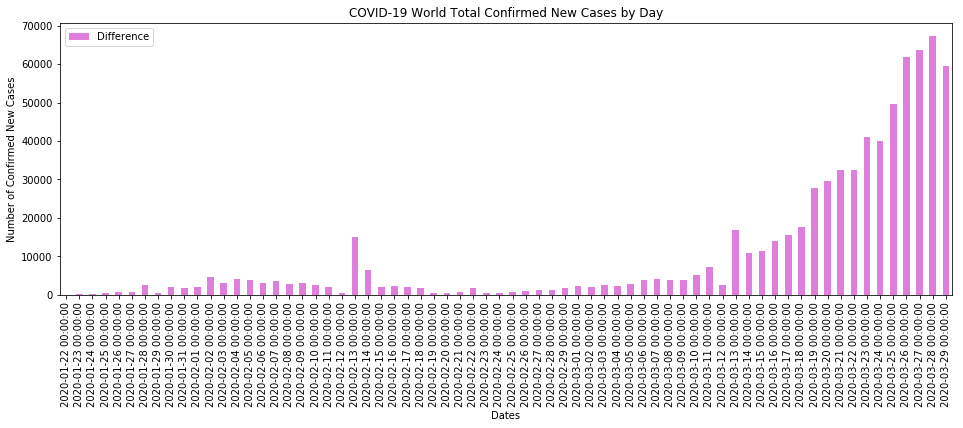

In [13]:
plt.rcParams["figure.figsize"] = (16,5)
dfd_casesv.plot(x='Date', y=(['Difference']),kind="bar",color="m",legend=None,alpha=0.5)
plt.title('COVID-19 World Total Confirmed New Cases by Day')
plt.ylabel('Number of Confirmed New Cases')
plt.xlabel('Dates')
plt.legend()
#plt.yscale('log')
plt.show()

#### Graph 2 - COVID-19 World Total Confirmed Deaths Cases by Day

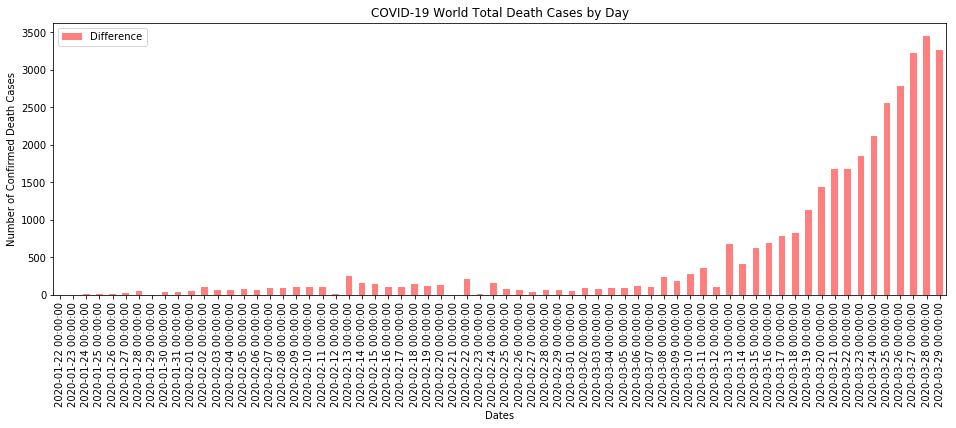

In [14]:
plt.rcParams["figure.figsize"] = (16,5)
dfd_deathsv.plot(x='Date', y=(['Difference']),kind="bar",color="r",legend=None,alpha=0.5)
plt.title('COVID-19 World Total Death Cases by Day')
plt.ylabel('Number of Confirmed Death Cases')
plt.xlabel('Dates')
plt.legend()
#plt.yscale('log')
plt.show()

#### Graph 3 - COVID-19 World Cumulative Confirmed Cases by Day

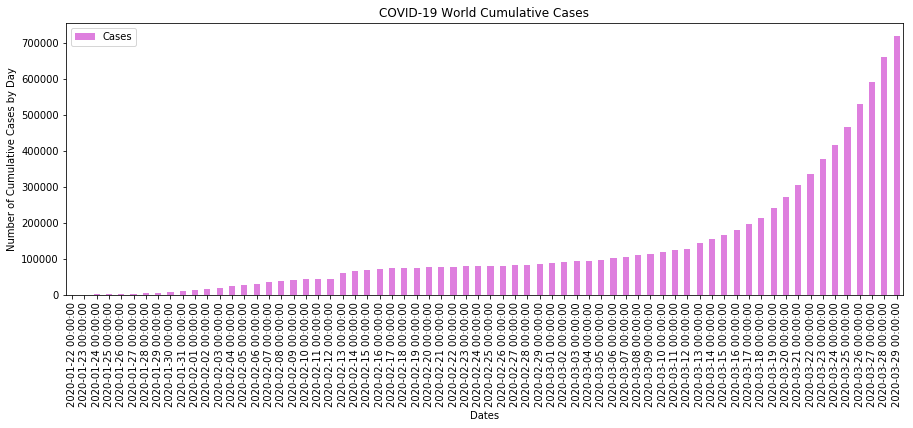

In [15]:
plt.rcParams["figure.figsize"] = (15,5)
dfd_casesv.plot(x='Date', y=(['Cases']),kind="bar",color="m",legend=None,alpha=0.5)
plt.title('COVID-19 World Cumulative Cases')
plt.ylabel('Number of Cumulative Cases by Day')
plt.xlabel('Dates')
plt.legend()
#plt.yscale('log')
plt.show()

#### Graph 4 - COVID-19  World Cumulative Deasth Cases by Day

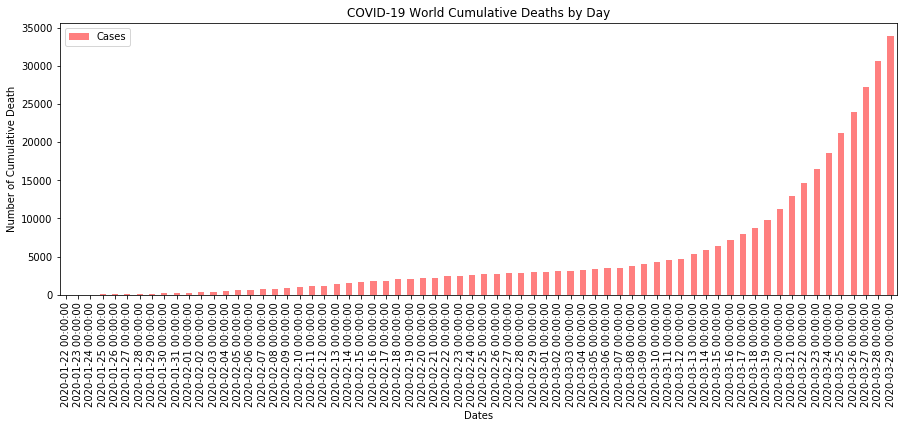

In [16]:
plt.rcParams["figure.figsize"] = (15,5)
dfd_deathsv.plot(x='Date', y=(['Cases']),kind="bar",color="r",legend=None,alpha=0.5)
plt.title('COVID-19 World Cumulative Deaths by Day')
plt.ylabel('Number of Cumulative Death')
plt.xlabel('Dates')
plt.legend()
#plt.yscale('log')
plt.show()

#### Graph 5 - COVID-19 Top 10 Countries  Cumulative Confirmed  Cases by Day

In [17]:
# Group New Cases by day
dfd_cases_cum=pd.pivot_table(dfd_cases_c, index=['Date','Country_Region'],values=['Cases'],aggfunc=np.sum)
dfd_cases_cum.reset_index(drop=False, inplace=True)
dfd_cases_cum.head()

,Date,Country_Region,Cases
0,2020-01-22,Afghanistan,0.0
1,2020-01-22,Albania,0.0
2,2020-01-22,Algeria,0.0
3,2020-01-22,Andorra,0.0
4,2020-01-22,Angola,0.0


Top 10 Countries - Confirmed Cumulative Cases


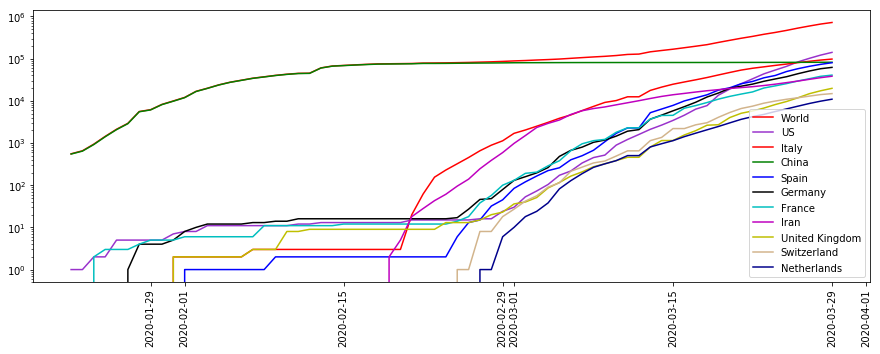

In [18]:
length=10
plt.figure()
plt.rcParams["figure.figsize"] = (16,10) 
plt.title('COVID-19 Top 10 Countries Total Confirmed Cases by Day')
plt.ylabel('Number of Confirmed New Cases')
plt.xlabel('Dates')
colours=['darkorchid','r','g','b','k','c','m','y','tan','darkblue','darkmagenta','darkorange']
plt.axes(yscale='log')
plt.alpha=0.5
plt.xticks(rotation=90)
print('Top 10 Countries - Confirmed Cumulative Cases')
Date='xxx'
Total='yyy'
dfd_world_tmp = dfd_world_c
x=0
plt.plot(dfd_world_tmp['Date'],dfd_world_tmp['Total'],colours[1],label='World')

for y in range(length): 
    country = dfd_top_c.iloc[y,0]
    dfd_cases_tmp=dfd_cases_cum.loc[dfd_cases_cum['Country_Region']==country]
    plt.plot(dfd_cases_tmp['Date'],dfd_cases_tmp['Cases'],colours[y],label=country)

plt.legend()
plt.show()



#### Graph 6 - COVID-19 Top 10 Countries  Cumulative Death  Cases by Day

In [19]:
dfd_world_tmp = dfd_world_d

# Group NDeaths Cases by day
dfd_cases_cum_d=pd.pivot_table(dfd_deaths_c, index=['Date','Country_Region'],values=['Cases'],aggfunc=np.sum)
dfd_cases_cum_d.reset_index(drop=False, inplace=True)
dfd_cases_cum_d.head()

,Date,Country_Region,Cases
0,2020-01-22,Afghanistan,0.0
1,2020-01-22,Albania,0.0
2,2020-01-22,Algeria,0.0
3,2020-01-22,Andorra,0.0
4,2020-01-22,Angola,0.0


Top 10 Countries - Confirmed Death Cases


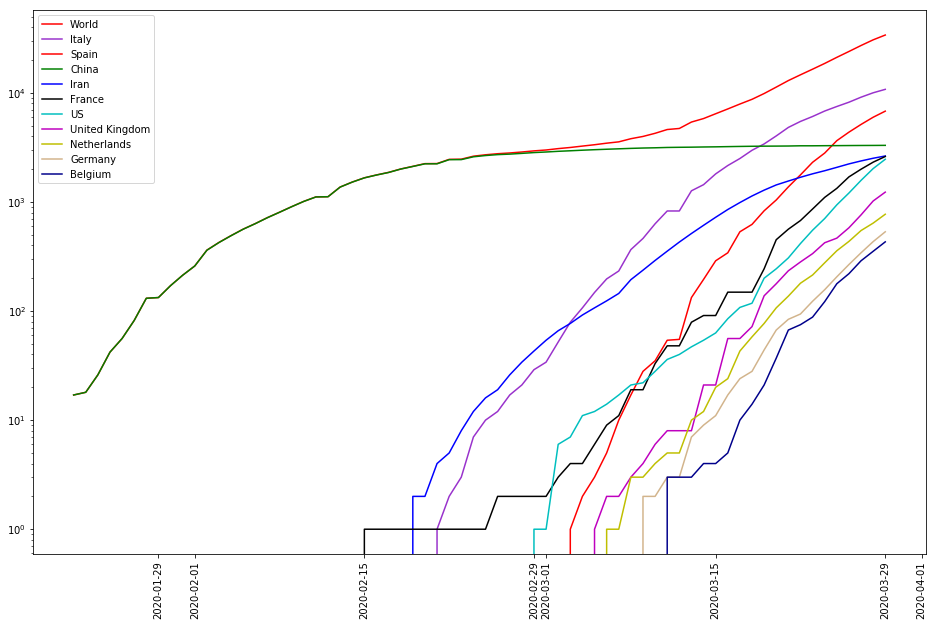

In [20]:
length=10
plt.figure()
# plt.rcParams["figure.figsize"] = (16,10) 
plt.title('COVID-19 World Total Confirmed Cases by Day')
plt.ylabel('Number of Confirmed New Cases')
plt.xlabel('Dates')
colours=['darkorchid','r','g','b','k','c','m','y','tan','darkblue','darkmagenta','darkorange']
plt.axes(yscale='log')
plt.alpha=0.5
plt.xticks(rotation=90)
print('Top 10 Countries - Confirmed Death Cases')
Date='xxx'
Total='yyy'
dfd_world_tmp = dfd_world_d
x=0
plt.plot(dfd_world_tmp['Date'],dfd_world_tmp['Total'],colours[1],label='World')

for y in range(length): 
    country = dfd_top_d.iloc[y,0]
    dfd_cases_tmp=dfd_cases_cum_d.loc[dfd_cases_cum_d['Country_Region']==country]
    plt.plot(dfd_cases_tmp['Date'],dfd_cases_tmp['Cases'],colours[y],label=country)

plt.legend()
plt.show()

### 4.2. Estimate Growth Using  an Autoregression Model

In [21]:
dfd_reg = dfd_casesv.filter(['Date','Difference'], axis=1)

# Get names of indexes for which column location has value 'World'
indexNames = dfd_reg[dfd_reg['Difference'] == 0.0].index
 
# Delete these row indexes from dataFrame
dfd_reg.drop(indexNames , inplace=True)
dfd_reg.head()


,Date,Difference
1,2020-01-23,99.0
2,2020-01-24,287.0
3,2020-01-25,493.0
4,2020-01-26,684.0
5,2020-01-27,809.0


### Perform a Logaritmic Transformation of the Data Series to Correct for Trend

,Date,Difference,Difference_log,Difference_log_diff
0,2020-01-24,287.0,5.659482,4.595120
1,2020-01-25,493.0,6.200509,5.659482
2,2020-01-26,684.0,6.527958,6.200509
3,2020-01-27,809.0,6.695799,6.527958
4,2020-01-28,2651.0,7.882692,6.695799


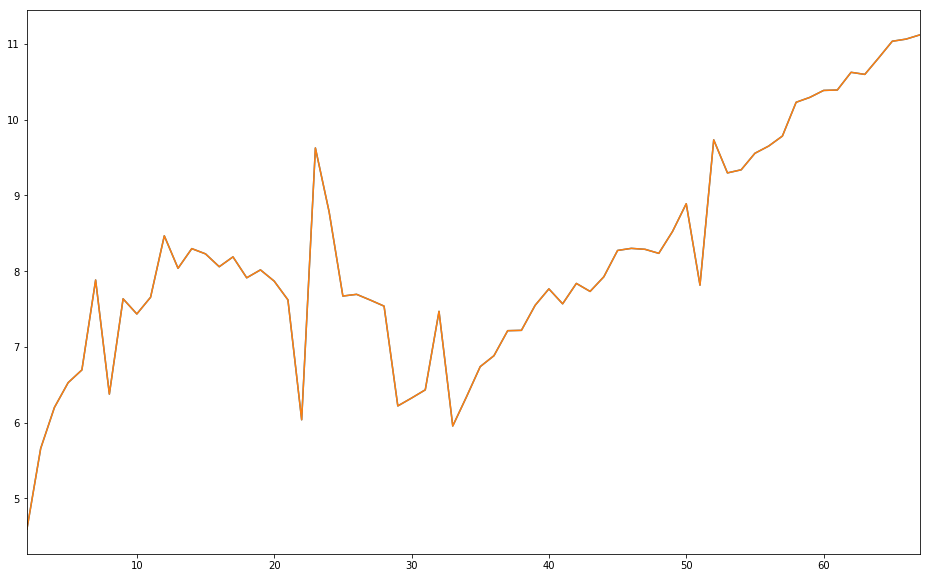

In [22]:

dfd_reg['Difference_log'] = np.log(dfd_reg['Difference'])
for z in range(len(dfd_reg),0,-1):
    dfd_reg['Difference_log_diff'] = dfd_reg['Difference_log'].shift(z)

dfd_reg['Difference_log_diff'].dropna().plot()

# Get names of indexes for which column location has value 'World'
indexNames = dfd_reg[dfd_reg['Date'] == '01/23/2020'].index
 
# Delete these row indexes from dataFrame
dfd_reg.drop(indexNames , inplace=True)

dfd_reg['Difference_log_diff'].dropna().plot()
dfd_reg.reset_index(drop=True, inplace=True)
dfd_reg.head()    
#Replace all NaN values for zeroes
#dfd_reg = dfd_reg.replace(np.nan, 0.00001)



In [23]:
dfd_reg1 = dfd_reg.filter(['Date','Difference_log_diff'], axis=1)
dfd_reg1.reset_index(drop=True, inplace=True)
dfd_reg1.head()

,Date,Difference_log_diff
0,2020-01-24,4.595120
1,2020-01-25,5.659482
2,2020-01-26,6.200509
3,2020-01-27,6.527958
4,2020-01-28,6.695799


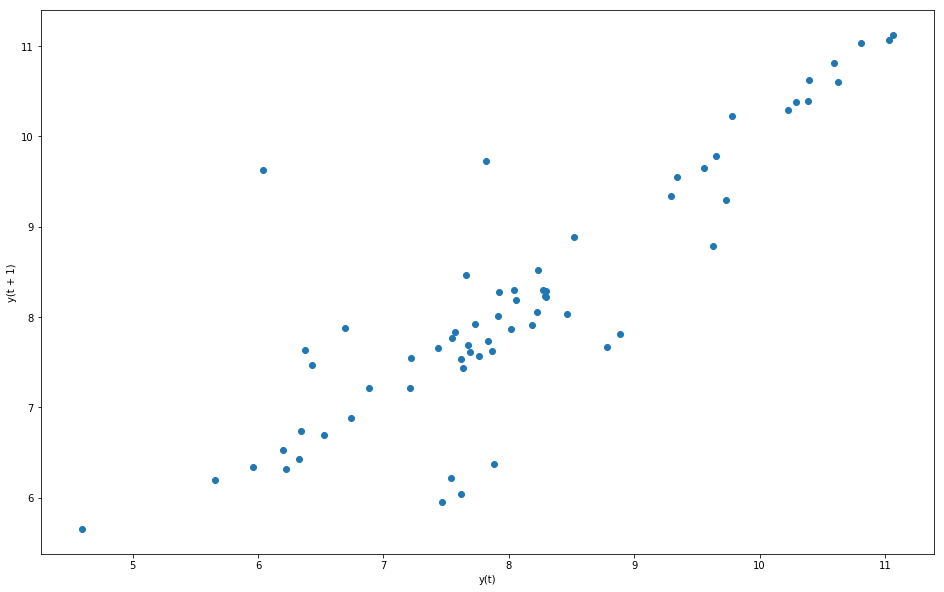

In [24]:
from pandas.plotting import lag_plot
series=dfd_reg1['Difference_log_diff']
lag_plot(series)
plt.show()

In [25]:
# Import Libraries
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
values = series.values

### Prediction AR Fixed Model

Lag: 10
Coefficients: [ 0.31404259  0.38198868  0.27781689  0.29942938  0.16167523 -0.02726102
 -0.17998337  0.02956372  0.12234945  0.11775289 -0.2145445 ]
Predicted value=10.684691, Expected value=10.390410
Predicted value=10.444255, Expected value=10.623861
Predicted value=10.565600, Expected value=10.596385
Predicted value=10.600123, Expected value=10.811988
Predicted value=10.603098, Expected value=11.033889
Predicted value=10.638300, Expected value=11.061940
Predicted value=10.669915, Expected value=11.117510
Test MSE: 0.104
Test RMS = 0.3229522202333551


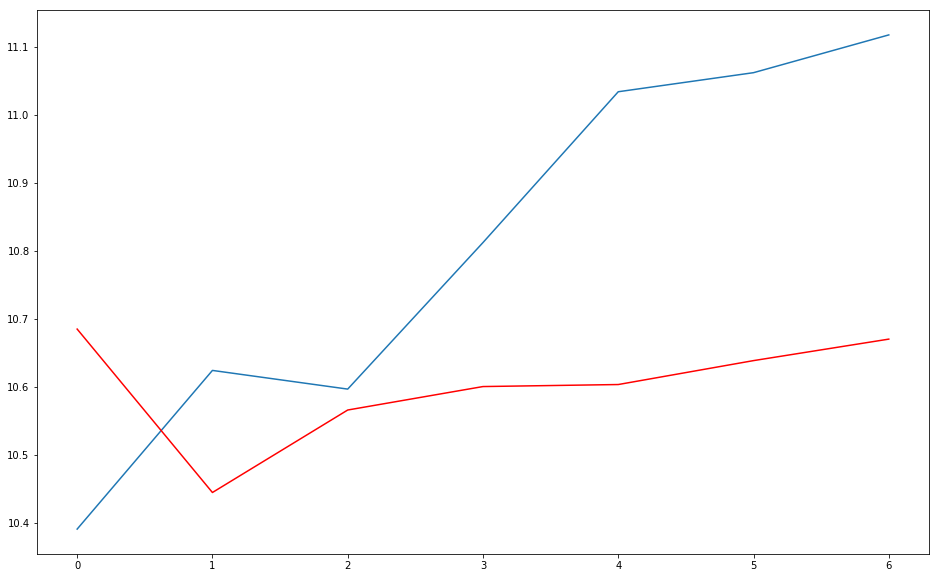

In [26]:
# Split Dataset
X=values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# Predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('Predicted value=%f, Expected value=%f' % (predictions[i], test[i]))
mse = mean_squared_error(test, predictions)
rms = sqrt(mean_squared_error(test, predictions))

print('Test MSE: %.3f' % mse)
print('Test RMS =',rms)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### Variation - Prediction AR Rolling Model

#### yhat = b0 + b1*X1 + b2*X2 ... bn*Xn

Coefficients: [ 0.08932523  0.39654237  0.26910789  0.2911767   0.17467314 -0.00886486
 -0.18780553  0.01555961  0.09379798  0.08172687 -0.20686406  0.08019532]
11
predicted=10.659128, expected=10.596385
predicted=10.629673, expected=10.811988
predicted=10.749024, expected=11.033889
predicted=10.962061, expected=11.061940
predicted=11.111994, expected=11.117510
Test MSE: 0.026
RMS = 0.1602059903503424


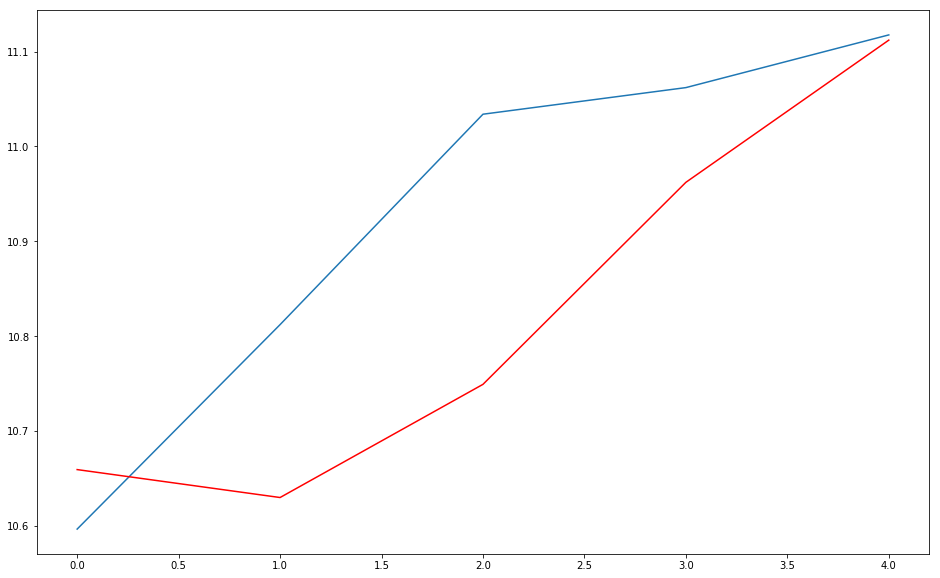

In [27]:
# split dataset
X=values
train, test = X[1:len(X)-5], X[len(X)-5:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Coefficients: %s' % model_fit.params)
print(window)
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
error1 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
rms = sqrt(mean_squared_error(test, predictions))
print('RMS =',rms)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## 5. References

Pandit, Sudhakar M.; Wu, Shien-Ming (1983). Time Series and System Analysis with Applications. John Wiley & Sons

Wikipedia: Autoregressive model 

John Hopkins University Coronavirus Resource Center
